In [4]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns 

In [5]:
# csv with adjusted MKTCAP
# ALLDF['時価総額']*(ALLDF['発行済株式数']-ALLDF['自己株式数'])/ALLDF['発行済株式数']
raw = pd.read_csv('MKTCAP_LN.csv', encoding = 'cp932').dropna()
raw.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
0,2000,AAL,0.0000,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,...,4722.000,-4027.000,11819.000,12514.000,0.189228,inf,inf,0.114236,0.401220,0.0000
1,2000,ABF,3385.8000,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,...,1022.000,-735.000,1459.000,1746.000,0.187285,0.096580,0.265137,0.111833,0.092430,3385.8000
2,2000,ACL,121.9050,245.360,13.484,8.232,146.453,8.461,0.000,86.766,...,78.305,-54.935,9.342,32.712,0.412203,0.110611,0.481594,0.390139,0.092395,121.9050
3,2000,ADB,0.0000,32.645,2.448,1.466,23.528,0.412,0.000,6.764,...,6.352,-5.785,16.087,16.654,0.146992,inf,inf,0.185581,0.528041,0.0000
4,2000,ADN,846.9825,115.721,34.225,24.126,274.148,45.815,3.054,91.628,...,42.759,-81.432,11.307,-27.366,-1.250639,0.040408,-1.085167,0.306294,0.041408,846.9825


In [6]:
# any zero or blow zero MKTCAP values
raw[raw['MKTCAP'] < 0][['security_code', '時価総額', 'MKTCAP']].head()

print (raw.shape)

# adjusted  MKTCAP has several zero MKTCAP values 
raw[raw['MKTCAP'] == 0][['security_code', '時価総額', 'MKTCAP']].shape

(13620, 76)


(3987, 3)

In [7]:
# csv with unadjusted MKTCAP
df = pd.read_csv('sqldataln.csv', encoding = 'cp932')
print (df.shape)
df.head()

(502814, 5)


,security_code,ddate,quarter,title,value
0,7DIG,2001,200101,ANNOUNCEMENT_DT,2.001070e+07
1,7DIG,2001,200101,BS_ACCT_NOTE_RCV,6.470000e-01
2,7DIG,2001,200101,BS_ACCT_PAYABLE,3.200000e-01
3,7DIG,2001,200101,BS_CASH_NEAR_CASH_ITEM,2.368000e+00
4,7DIG,2001,200101,BS_CUR_ASSET_REPORT,3.393000e+00


In [8]:
new = pd.merge(raw, df, how = 'left', left_on = ['security_code', 'ddate'], right_on = ['security_code', 'ddate'])

In [238]:
unadjust = new[new['title'] == 'HISTORICAL_MARKET_CAP'].dropna()

print (unadjust.shape)
unadjust.head()

(13236, 79)


,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP,quarter,title,value
21,2000,AAL,0.0000,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,...,12514.000,0.189228,inf,inf,0.114236,0.401220,0.0000,200001,HISTORICAL_MARKET_CAP,22469.2680
51,2000,ABF,3385.8000,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,...,1746.000,0.187285,0.096580,0.265137,0.111833,0.092430,3385.8000,200001,HISTORICAL_MARKET_CAP,2652.1079
80,2000,ACL,121.9050,245.360,13.484,8.232,146.453,8.461,0.000,86.766,...,32.712,0.412203,0.110611,0.481594,0.390139,0.092395,121.9050,200001,HISTORICAL_MARKET_CAP,116.6681
109,2000,ADB,0.0000,32.645,2.448,1.466,23.528,0.412,0.000,6.764,...,16.654,0.146992,inf,inf,0.185581,0.528041,0.0000,200001,HISTORICAL_MARKET_CAP,20.2960
138,2000,ADN,846.9825,115.721,34.225,24.126,274.148,45.815,3.054,91.628,...,-27.366,-1.250639,0.040408,-1.085167,0.306294,0.041408,846.9825,200001,HISTORICAL_MARKET_CAP,884.2819


In [240]:
unadjust[unadjust['value'] == 0]

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP,quarter,title,value
10305,2000,SGRO,1620.9200,286.7,108.2,118.1,4000.5,36.9,106.4,0.0,...,3375.1,0.032058,0.066752,0.095605,0.027047,0.036947,1620.9200,200001,HISTORICAL_MARKET_CAP,0.0
24483,2001,SGRO,1647.7975,282.1,115.4,54.5,4165.4,175.9,135.3,0.0,...,4567.7,0.025264,0.070033,0.092771,0.027704,0.038301,1647.7975,200101,HISTORICAL_MARKET_CAP,0.0


In [10]:
# any zero or below zero MKTCAP vlaue 
mktcap_value = unadjust[unadjust['title'] == 'HISTORICAL_MARKET_CAP'][['security_code', 'value']]

# unadjusted MKTCAP are all greater than zero
mktcap_value[mktcap_value['value'] == 0]
mktcap_value[mktcap_value['value'] < 0]

,security_code,value


In [11]:
# compare the difference of adjusted and unadjusted MKTCAP dataframes 

print(raw.shape)
print (unadjust.shape)

# drop index for both dataframes tp comapre rows using isin or != later 
d1 = raw.reset_index(drop = True)
d2 = unadjust.iloc[:, :-3].reset_index(drop = True)

# intersection
d12 = pd.merge (d1, d2, how = 'inner').reset_index( drop = True)

(13620, 76)
(13236, 79)


In [14]:
# intersection of the two dataframes is the unadjusted MKTCAP one
check = d12 != d2

np.sum(np.sum(check, axis = 0))

0

In [15]:
# select entries in d1 that does not have matching d2 entries
# d2 is the smaller dataframe 
# if d1 has the matching d2 entries, NaN will be returned  

distinct = d1[~d2.isin(d1)].dropna(how = 'all')
print( distinct.shape)
d1[~d2.isin(d1)].head(8)

(13229, 76)


,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,AEX,16.4568,6.331,1.217,1.827,51.928,4.485,NaN,11.231,...,6.746,-5.369,37.747,39.124,0.031106,0.073951,0.101947,0.026368,0.063882,16.4568


In [16]:
raw[raw['security_code'] == 'AEX']

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
7,2000,AEX,16.4568,6.331,1.217,1.827,51.928,4.485,0.000,11.231,...,6.746,-5.369,37.747,39.124,0.031106,0.073951,0.101947,0.026368,0.063882,16.4568
508,2001,AEX,17.7888,4.119,-0.989,4.941,42.736,24.836,0.000,28.047,...,3.211,-3.233,11.374,11.352,-0.087121,-0.055597,-0.134006,-0.025112,0.145544,17.7888
1049,2002,AEX,14.5459,3.496,-2.999,-4.949,37.601,8.287,0.000,13.219,...,4.932,-5.738,13.585,12.779,-0.234682,-0.206175,-0.417389,-0.120616,-0.454607,14.5459
1628,2003,AEX,18.6369,7.153,-2.067,-4.133,33.221,0.346,2.003,8.451,...,6.102,-5.167,12.834,13.769,-0.150120,-0.110909,-0.246017,-0.123928,-0.110618,18.6369
2267,2004,AEX,9.2402,5.384,-4.576,-4.509,26.622,0.767,0.000,6.869,...,6.102,-4.785,5.443,6.760,-0.676923,-0.495227,-1.104458,-0.611765,-0.533881,9.2402
2957,2005,AEX,59.6241,3.000,-4.930,-4.979,29.498,3.884,0.000,5.063,...,1.179,-1.946,8.368,7.601,-0.648599,-0.082685,-0.666424,-0.415648,-0.088233,59.6241
3741,2006,AEX,38.4426,5.019,-2.787,-2.862,32.087,3.648,0.000,5.180,...,1.532,-1.310,9.424,9.646,-0.288928,-0.072498,-0.332533,-0.203892,-0.079766,38.4426
4593,2007,AEX,53.2662,9.304,-3.566,-3.269,60.998,18.642,0.000,23.952,...,5.310,-6.243,9.196,8.263,-0.431562,-0.066947,-0.455353,-0.129095,-0.102280,53.2662
5544,2008,AEX,15.4472,10.177,-1.601,-9.662,49.704,4.097,0.000,8.392,...,4.295,-5.291,12.119,11.123,-0.143936,-0.103643,-0.233186,-0.102333,-0.138817,15.4472
6556,2009,AEX,48.4961,7.848,-2.765,-2.895,60.091,11.689,0.000,14.317,...,2.628,-2.624,11.718,11.722,-0.235881,-0.057015,-0.269308,-0.116563,-0.074847,48.4961


In [226]:
# there is no data entry for AEX in 2000 from the DB 

# AEX = df[df['security_code'] == 'AEX']
# AEX[AEX['title'] == 'HISTORICAL_MARKET_CAP']

# d2[d2['ddate']== 2000][d2[d2['ddate']== 2000]['security_code'] == 'AEX']
d2[d2['security_code'] == 'AEX']

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
447,2001,AEX,17.7888,4.119,-0.989,4.941,42.736,24.836,0.000,28.047,...,3.211,-3.233,11.374,11.352,-0.087121,-0.055597,-0.134006,-0.025112,0.145544,17.7888
914,2002,AEX,14.5459,3.496,-2.999,-4.949,37.601,8.287,0.000,13.219,...,4.932,-5.738,13.585,12.779,-0.234682,-0.206175,-0.417389,-0.120616,-0.454607,14.5459
1399,2003,AEX,18.6369,7.153,-2.067,-4.133,33.221,0.346,2.003,8.451,...,6.102,-5.167,12.834,13.769,-0.150120,-0.110909,-0.246017,-0.123928,-0.110618,18.6369
1887,2004,AEX,9.2402,5.384,-4.576,-4.509,26.622,0.767,0.000,6.869,...,6.102,-4.785,5.443,6.760,-0.676923,-0.495227,-1.104458,-0.611765,-0.533881,9.2402
2429,2005,AEX,59.6241,3.000,-4.930,-4.979,29.498,3.884,0.000,5.063,...,1.179,-1.946,8.368,7.601,-0.648599,-0.082685,-0.666424,-0.415648,-0.088233,59.6241
3054,2006,AEX,38.4426,5.019,-2.787,-2.862,32.087,3.648,0.000,5.180,...,1.532,-1.310,9.424,9.646,-0.288928,-0.072498,-0.332533,-0.203892,-0.079766,38.4426
3769,2007,AEX,53.2662,9.304,-3.566,-3.269,60.998,18.642,0.000,23.952,...,5.310,-6.243,9.196,8.263,-0.431562,-0.066947,-0.455353,-0.129095,-0.102280,53.2662
4547,2008,AEX,15.4472,10.177,-1.601,-9.662,49.704,4.097,0.000,8.392,...,4.295,-5.291,12.119,11.123,-0.143936,-0.103643,-0.233186,-0.102333,-0.138817,15.4472
5374,2009,AEX,48.4961,7.848,-2.765,-2.895,60.091,11.689,0.000,14.317,...,2.628,-2.624,11.718,11.722,-0.235881,-0.057015,-0.269308,-0.116563,-0.074847,48.4961
6208,2010,AEX,0.0000,7.081,-4.568,-4.495,62.960,2.905,0.000,4.976,...,2.071,-4.334,18.048,15.785,-0.289389,-inf,-inf,-0.238301,1.626781,0.0000


In [17]:
# double check data intersection from 2015 and 2016 in the DB
mk = df[df['title'] == 'HISTORICAL_MARKET_CAP']

mk_2015 = mk[mk['ddate'] == 2015]
print (mk_2015.shape)

mk_2016 = mk[mk['ddate'] == 2016]
print(mk_2016.shape)

mk56 = pd.merge(mk_2015, mk_2016, how = 'left', on = ['security_code'])
print(mk56.shape)

mk56.head()

(1274, 5)
(1311, 5)
(1282, 9)


,security_code,ddate_x,quarter_x,title_x,value_x,ddate_y,quarter_y,title_y,value_y
0,7DIG,2015,201501,HISTORICAL_MARKET_CAP,7.7257,2016.0,201601.0,HISTORICAL_MARKET_CAP,7.3014
1,888,2015,201501,HISTORICAL_MARKET_CAP,960.1755,2016.0,201601.0,HISTORICAL_MARKET_CAP,960.6034
2,AA/,2015,201501,HISTORICAL_MARKET_CAP,1981.9350,2016.0,201601.0,HISTORICAL_MARKET_CAP,1790.4874
3,AAA,2015,201501,HISTORICAL_MARKET_CAP,32.9880,2016.0,201601.0,HISTORICAL_MARKET_CAP,20.2185
4,AAL,2015,201501,HISTORICAL_MARKET_CAP,5667.4586,2016.0,201601.0,HISTORICAL_MARKET_CAP,18308.3621


In [18]:
mk = mk56.drop(['title_x', 'title_y', 'value_x', 'quarter_x', 'quarter_y', 'ddate_y'], axis = 1)

In [19]:
mk = mk.rename(columns = {'value_y':'value', 'ddate_x': 'ddate'}).replace([float('-inf'), float('inf')], np.nan).dropna()
print (mk.shape)
mk.head()

(1255, 3)


,security_code,ddate,value
0,7DIG,2015,7.3014
1,888,2015,960.6034
2,AA/,2015,1790.4874
3,AAA,2015,20.2185
4,AAL,2015,18308.3621


In [23]:
# dada = data2[['security_code', 'ddate', 'value']].replace([float('-inf'), float('inf')], np.nan).dropna()
# print (dada.shape)
# dada.head()

In [24]:
# # company AAA is in the data base while not in unadjusted MKTCAP
# # too many other entries do not match too
# # create the dataframe from DB csv instead of merging 

# distinct = mk[~dada.isin(mk)].dropna(how = 'all')
# print (distinct.shape)
# mk[~dada.isin(mk)].head()

# from DB csv

In [203]:
df = pd.read_csv('sqldataln.csv', encoding = 'cp932')
df.head()

,security_code,ddate,quarter,title,value
0,7DIG,2001,200101,ANNOUNCEMENT_DT,2.001070e+07
1,7DIG,2001,200101,BS_ACCT_NOTE_RCV,6.470000e-01
2,7DIG,2001,200101,BS_ACCT_PAYABLE,3.200000e-01
3,7DIG,2001,200101,BS_CASH_NEAR_CASH_ITEM,2.368000e+00
4,7DIG,2001,200101,BS_CUR_ASSET_REPORT,3.393000e+00


In [204]:
mv = df[df['title'] == 'HISTORICAL_MARKET_CAP']

print(mv.shape)
mv.head()

(14902, 5)


,security_code,ddate,quarter,title,value
21,7DIG,2001,200101,HISTORICAL_MARKET_CAP,39.1183
53,7DIG,2002,200201,HISTORICAL_MARKET_CAP,0.0000
85,7DIG,2003,200301,HISTORICAL_MARKET_CAP,0.0000
114,7DIG,2004,200401,HISTORICAL_MARKET_CAP,50.5399
142,7DIG,2005,200501,HISTORICAL_MARKET_CAP,49.9159


In [205]:
# remove duplicated entries with the same announcement date  
# Return DataFrame with duplicate rows removed

data2 = df[df['title'] == 'ANNOUNCEMENT_DT'].drop_duplicates(subset = ['security_code','value'], keep = 'last')

print( data2.shape)
data2.head()

(15887, 5)


,security_code,ddate,quarter,title,value
0,7DIG,2001,200101,ANNOUNCEMENT_DT,20010702.0
30,7DIG,2002,200201,ANNOUNCEMENT_DT,20020708.0
62,7DIG,2003,200301,ANNOUNCEMENT_DT,20030623.0
94,7DIG,2004,200401,ANNOUNCEMENT_DT,20040621.0
123,7DIG,2005,200501,ANNOUNCEMENT_DT,20050620.0


In [206]:
data4 = pd.merge(data2, mv, how = 'inner', left_on = ['security_code', 'ddate'], right_on = ['security_code', 'ddate'])
data4.head()

,security_code,ddate,quarter_x,title_x,value_x,quarter_y,title_y,value_y
0,7DIG,2001,200101,ANNOUNCEMENT_DT,20010702.0,200101,HISTORICAL_MARKET_CAP,39.1183
1,7DIG,2002,200201,ANNOUNCEMENT_DT,20020708.0,200201,HISTORICAL_MARKET_CAP,0.0000
2,7DIG,2003,200301,ANNOUNCEMENT_DT,20030623.0,200301,HISTORICAL_MARKET_CAP,0.0000
3,7DIG,2004,200401,ANNOUNCEMENT_DT,20040621.0,200401,HISTORICAL_MARKET_CAP,50.5399
4,7DIG,2005,200501,ANNOUNCEMENT_DT,20050620.0,200501,HISTORICAL_MARKET_CAP,49.9159


In [235]:
table = data4[data4['title_y'] == 'HISTORICAL_MARKET_CAP']
table[table['ddate'] == 2015].shape

(1280, 8)

In [207]:
df2 = data4[['security_code', 'ddate', 'quarter_x', 'title_y', 'value_y']].rename(columns = {'quarter_x': 'quarter', 'title_y': 'title', 'value_y': 'value'})

print (df2.shape)
df2.head()

(14833, 5)


,security_code,ddate,quarter,title,value
0,7DIG,2001,200101,HISTORICAL_MARKET_CAP,39.1183
1,7DIG,2002,200201,HISTORICAL_MARKET_CAP,0.0000
2,7DIG,2003,200301,HISTORICAL_MARKET_CAP,0.0000
3,7DIG,2004,200401,HISTORICAL_MARKET_CAP,50.5399
4,7DIG,2005,200501,HISTORICAL_MARKET_CAP,49.9159


In [208]:
# DataFrame.append(df)
# append rows of another dataframe to the end of this one; column names do not exist will be added as new columns 

df3 = df[(df['title'] != 'ANNOUNCEMENT_DT') & (df['title'] != 'HISTORICAL_MARKET_CAP')].append(df2)
df3.tail()

,security_code,ddate,quarter,title,value
14828,ZZZ,2012,201201,HISTORICAL_MARKET_CAP,38.9421
14829,ZZZ,2013,201301,HISTORICAL_MARKET_CAP,13.0680
14830,ZZZ,2014,201401,HISTORICAL_MARKET_CAP,18.0065
14831,ZZZ,2015,201501,HISTORICAL_MARKET_CAP,12.9752
14832,ZZZ,2016,201601,HISTORICAL_MARKET_CAP,1.1807


In [259]:
namelist = pd.read_csv('mnemonic.csv',encoding='cp932')
data = pd.merge(df3, namelist[['title','フィールド名']], how='left')

print(data.shape)
data.head()

(486175, 6)


,security_code,ddate,quarter,title,value,フィールド名
0,7DIG,2001,200101,BS_ACCT_NOTE_RCV,0.647,売掛金
1,7DIG,2001,200101,BS_ACCT_PAYABLE,0.320,買掛金
2,7DIG,2001,200101,BS_CASH_NEAR_CASH_ITEM,2.368,現金･現金同等物
3,7DIG,2001,200101,BS_CUR_ASSET_REPORT,3.393,流動資産
4,7DIG,2001,200101,BS_CUR_LIAB,1.297,流動負債


In [210]:
def DF_CALCULATION(DF):

    titlelist = namelist['フィールド名'].as_matrix().tolist()
    DF = DF.reindex(columns = titlelist, fill_value = 0)

#### first part of the calcualtions are using original data fields from financial statement   

#     DF['売掛金']=DF['売掛金']+DF['貸倒引当金']
#     DF['流動資産その他']=DF['流動資産']-DF['現金･現金同等物']-DF['有価証券']-DF['売掛金']+DF['貸倒引当金']-DF['棚卸']-DF['短期繰延税金資産']
#     DF['投資資産']=DF['非流動資産合計']-DF['有形固定資産']-DF['無形資産']
#     DF['無形資産その他']=DF['無形資産']-DF['のれん･営業権']
#     DF['投資資産その他']=DF['投資資産']-DF['総長期投資']-DF['敷金及び保証金']-DF['長期貸付金']
#     DF['流動負債その他']=DF['流動負債']-DF['買掛金']-DF['未払費用']-DF['短期借入金']-DF['長期借入金(当期返済分)']-DF['賞与引当金']
#     DF['固定負債']=DF['負債合計']-DF['流動負債']
#     DF['固定負債その他']=DF['固定負債']-DF['長期繰延税金負債']-DF['長期借入金']
#     DF['剰余金']=DF['剰余金']+DF['自己株金額']
# #     DF['自己資本その他']=DF['自己資本']-DF['資本金']-DF['剰余金']+DF['自己株金額']-DF['少数持分']
#     DF['株主資本']=DF['資本金']+DF['剰余金']-DF['自己株金額']+DF['少数持分']
#     DF['販管費']=DF['営業利益']-DF['売上総利益']
# #     DF['売上総利益率']=DF['売上総利益']/DF['売上']
# #     DF['営業利益率']=DF['営業利益']/DF['売上']
#     DF['株主還元']=DF['剰余金の配当']+DF['自己株式の取得']+DF['自己株式の消却']+DF['新株の発行']

    
#     DF['純現金資産']=DF['現金･現金同等物']+DF['有価証券']+DF['総長期投資']-DF['短期借入金']-DF['長期借入金']-DF['長期借入金(当期返済分)']
#     DF['営業資産']=DF['流動資産']-DF['現金･現金同等物']-DF['有価証券']-DF['短期繰延税金資産']
#     DF['営業負債']=-(DF['流動負債']-DF['短期借入金']-DF['長期借入金(当期返済分)']-DF['賞与引当金'])
#     DF['有形固定']=DF['有形固定資産']+DF['敷金及び保証金']+DF['長期貸付金']
#     DF['使用資産']=DF['営業資産']+DF['営業負債']+DF['有形固定']

############   
    
    
    DF['貸倒引当金']=-DF['貸倒引当金']
    DF['自己株金額']=-DF['自己株金額']
    DF['売上原価']=-DF['売上原価']
    DF['人件費']=-DF['人件費']


In [146]:
# 30% of the entres in data field 自己資本その他 is zero  
# the otheres are extremely small

np.sum(almost['自己資本その他'] == 0)/ almost['自己資本その他'].shape[0]
almost['自己資本その他'].describe()

count    1.671100e+04
mean     1.057362e+00
std      2.382183e+01
min     -3.600000e-03
25%     -8.881784e-16
50%      0.000000e+00
75%      1.776357e-15
max      1.504209e+03
Name: 自己資本その他, dtype: float64

In [149]:
# return columns with all zero values  

almost.columns[(~(almost != 0).any(axis = 0)).tolist()]

Index(['敷金及び保証金', '賞与引当金', '決算発表日', '剰余金の配当', '自己株式の消却', '新株の発行', '土地1',
       '経常利益', '長期社債(当期返済分)'],
      dtype='object')

In [251]:
# change data to pivot table with two levels of indices 

DF = data.pivot_table('value', aggfunc = 'sum',index = ['ddate','security_code'], columns = 'フィールド名', fill_value = 0) 


In [252]:
titlelist = namelist['フィールド名'].as_matrix().tolist()
DF = DF.reindex(columns = titlelist, fill_value = 0)

DF['貸倒引当金'] = -DF['貸倒引当金']
DF['自己株金額'] = -DF['自己株金額']
DF['売上原価'] = -DF['売上原価']
DF['人件費'] = -DF['人件費']

print (DF.shape)
DF.head()

(16711, 50)


フィールド名                     時価総額         売上      営業利益       純利益        総資産  \
ddate security_code                                                         
2000  AAL            22469.2680  14824.000  2368.000  1957.000  30616.000   
      ABF             2652.1079   4406.000   327.000   138.000   3867.000   
      ACL              116.6681    245.360    13.484     8.232    146.453   
      ADB               20.2960     32.645     2.448     1.466     23.528   
      ADN              884.2819    115.721    34.225    24.126    274.148   

フィールド名               現金･現金同等物      有価証券      流動資産    総長期投資     有形固定資産  \
ddate security_code                                                     
2000  AAL            1061.000  2344.000  8127.000  935.000  11819.000   
      ABF              65.000  1133.000  2220.000    4.000   1459.000   
      ACL               8.461     0.000    86.766    0.000      9.342   
      ADB               0.412     0.000     6.764    0.677     16.087   
      ADN              45.815     3.054    91.628   25.218     11.307   

フィールド名                 ...      長期繰延税金負債  長期社債(当期返済分)  長期借入金(当期返済分)    少数持分  \
ddate security_code    ...                                                    
2000  AAL              ...           0.0            0           0.0  2646.0   
      ABF              ...           0.0            0           0.0    78.0   
      ACL              ...           0.0            0           0.0     0.0   
      ADB              ...           0.0            0           0.0     0.0   
      ADN              ...           0.0            0           0.0     0.0   

フィールド名               自己株金額       人件費     税引前利益    非流動資産合計  自己株式数     発行済株式数  
ddate security_code                                                          
2000  AAL             -0.0 -3067.000  3444.000  22489.000    0.0  1483.8861  
      ABF             -0.0  -581.000   245.000   1647.000    0.0   791.6740  
      ACL             -0.0   -28.867    12.451     59.687    0.0    35.4745  
      ADB             -0.0    -5.897     2.239     16.764    0.0     0.4720  
      ADN             -0.0   -34.826    33.961    182.520    0.0   240.4588  

[5 rows x 50 columns]

In [213]:
# reset one of the indices 'ddate' as a column 
index_df = DF.reset_index('ddate')
print(index_df.columns)

index_df.head()

Index(['ddate', '時価総額', '売上', '営業利益', '純利益', '総資産', '現金･現金同等物', '有価証券', '流動資産',
       '総長期投資', '有形固定資産', '短期借入金', '長期借入金', '流動負債', '無形資産', '未払税金', '短期繰延税金資産',
       '敷金及び保証金', '賞与引当金', '決算発表日', '長期貸付金', '従業員数', '剰余金の配当', '自己株式の取得',
       '自己株式の消却', '新株の発行', '売上総利益', '土地1', '土地2', '売掛金', '棚卸', '買掛金',
       'のれん･営業権', '貸倒引当金', '剰余金', '資本金', '経常利益', '売上原価', '負債合計', '自己資本',
       '未払費用', '長期繰延税金負債', '長期社債(当期返済分)', '長期借入金(当期返済分)', '少数持分', '自己株金額',
       '人件費', '税引前利益', '非流動資産合計', '自己株式数', '発行済株式数'],
      dtype='object', name='フィールド名')


フィールド名,ddate,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,長期繰延税金負債,長期社債(当期返済分),長期借入金(当期返済分),少数持分,自己株金額,人件費,税引前利益,非流動資産合計,自己株式数,発行済株式数
security_code,,,,,,,,,,,,,,,,,,,,,
AAL,2000,22469.2680,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,935.000,...,0.0,0,0.0,2646.0,-0.0,-3067.000,3444.000,22489.000,0.0,1483.8861
ABF,2000,2652.1079,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,4.000,...,0.0,0,0.0,78.0,-0.0,-581.000,245.000,1647.000,0.0,791.6740
ACL,2000,116.6681,245.360,13.484,8.232,146.453,8.461,0.000,86.766,0.000,...,0.0,0,0.0,0.0,-0.0,-28.867,12.451,59.687,0.0,35.4745
ADB,2000,20.2960,32.645,2.448,1.466,23.528,0.412,0.000,6.764,0.677,...,0.0,0,0.0,0.0,-0.0,-5.897,2.239,16.764,0.0,0.4720
ADN,2000,884.2819,115.721,34.225,24.126,274.148,45.815,3.054,91.628,25.218,...,0.0,0,0.0,0.0,-0.0,-34.826,33.961,182.520,0.0,240.4588


In [214]:
# set the other index 'security_code' as another column  

index_df.index.name = None
index_df.columns.name = None
index_df.head()

,ddate,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,長期繰延税金負債,長期社債(当期返済分),長期借入金(当期返済分),少数持分,自己株金額,人件費,税引前利益,非流動資産合計,自己株式数,発行済株式数
AAL,2000,22469.2680,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,935.000,...,0.0,0,0.0,2646.0,-0.0,-3067.000,3444.000,22489.000,0.0,1483.8861
ABF,2000,2652.1079,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,4.000,...,0.0,0,0.0,78.0,-0.0,-581.000,245.000,1647.000,0.0,791.6740
ACL,2000,116.6681,245.360,13.484,8.232,146.453,8.461,0.000,86.766,0.000,...,0.0,0,0.0,0.0,-0.0,-28.867,12.451,59.687,0.0,35.4745
ADB,2000,20.2960,32.645,2.448,1.466,23.528,0.412,0.000,6.764,0.677,...,0.0,0,0.0,0.0,-0.0,-5.897,2.239,16.764,0.0,0.4720
ADN,2000,884.2819,115.721,34.225,24.126,274.148,45.815,3.054,91.628,25.218,...,0.0,0,0.0,0.0,-0.0,-34.826,33.961,182.520,0.0,240.4588


In [215]:
# reset_index() change the index to a column value with column name of index
soon = index_df.reset_index()

# rename the column of index to 'security_code'
almost = soon.rename(columns = {'index': 'security_code', '時価総額': 'value'})

# moving 'value' to the last column 
v = almost['value']
almost.drop(['value'], axis=1, inplace = True)
almost.insert(51, 'value', v)

print (almost.shape)
almost.head()

(16711, 52)


,security_code,ddate,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,長期社債(当期返済分),長期借入金(当期返済分),少数持分,自己株金額,人件費,税引前利益,非流動資産合計,自己株式数,発行済株式数,value
0,AAL,2000,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,935.000,...,0,0.0,2646.0,-0.0,-3067.000,3444.000,22489.000,0.0,1483.8861,22469.2680
1,ABF,2000,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,4.000,...,0,0.0,78.0,-0.0,-581.000,245.000,1647.000,0.0,791.6740,2652.1079
2,ACL,2000,245.360,13.484,8.232,146.453,8.461,0.000,86.766,0.000,...,0,0.0,0.0,-0.0,-28.867,12.451,59.687,0.0,35.4745,116.6681
3,ADB,2000,32.645,2.448,1.466,23.528,0.412,0.000,6.764,0.677,...,0,0.0,0.0,-0.0,-5.897,2.239,16.764,0.0,0.4720,20.2960
4,ADN,2000,115.721,34.225,24.126,274.148,45.815,3.054,91.628,25.218,...,0,0.0,0.0,-0.0,-34.826,33.961,182.520,0.0,240.4588,884.2819


# save the one called almost 

In [226]:
filepath = 'C:\\Users\\1098071\\Documents\\RF\\'
almost.to_csv(filepath + 'MKTCAP_LN_UNADJ.csv',index=True)

In [313]:
englist = list(namelist['title'][1:])

englist.append(namelist['title'][0])

# englist

In [314]:
#
almost.columns = almost.columns[:2].tolist() + englist

In [315]:
almost.head()

,security_code,ddate,SALES_REV_TURN,IS_OPER_INC,NET_INCOME,BS_TOT_ASSET,BS_CASH_NEAR_CASH_ITEM,BS_MKT_SEC_OTHER_ST_INVEST,BS_CUR_ASSET_REPORT,BS_LT_INVEST,...,ARD_CURR_PORTION_LT_LIAB_BONDS,ARD_CURRENT_PORTION_OF_LT_DEBT,MINORITY_NONCONTROLLING_INTEREST,BS_AMT_OF_TSY_STOCK,IS_PERSONNEL_EXP,PRETAX_INC,BS_TOT_NON_CUR_ASSET,BS_NUM_OF_TSY_SH,BS_SH_OUT,HISTORICAL_MARKET_CAP
0,AAL,2000,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,935.000,...,0,0.0,2646.0,-0.0,-3067.000,3444.000,22489.000,0.0,1483.8861,22469.2680
1,ABF,2000,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,4.000,...,0,0.0,78.0,-0.0,-581.000,245.000,1647.000,0.0,791.6740,2652.1079
2,ACL,2000,245.360,13.484,8.232,146.453,8.461,0.000,86.766,0.000,...,0,0.0,0.0,-0.0,-28.867,12.451,59.687,0.0,35.4745,116.6681
3,ADB,2000,32.645,2.448,1.466,23.528,0.412,0.000,6.764,0.677,...,0,0.0,0.0,-0.0,-5.897,2.239,16.764,0.0,0.4720,20.2960
4,ADN,2000,115.721,34.225,24.126,274.148,45.815,3.054,91.628,25.218,...,0,0.0,0.0,-0.0,-34.826,33.961,182.520,0.0,240.4588,884.2819


In [316]:
filepath = 'C:\\Users\\1098071\\Documents\\RF\\'
almost.to_csv(filepath + 'ENG_LN_UNADJ.csv',index=True)

In [216]:
# check = almost.replace([float('-inf'), float('inf')], np.nan)

# # check the rows with 'inf' values 

# # inf is caused by dividing data fields with '売上', which is zero for many companies,
# # plus the division is for rate calculation, i.e. '売上' appears more than once as a feature in feature space.
# check[check.isnull().any(axis = 1)].head()

In [217]:
# # remove entries with float('inf')... values 
# final = almost.replace([float('-inf'), float('inf')], np.nan).dropna()
# print (final.shape)

# DONT use the calculations using '売上' as features 

# remove all zero columns.
data = almost.loc[:, (almost != 0).any(axis = 0)]
print(data.shape)

(16711, 43)


In [218]:
almost.columns[(~(almost != 0).any(axis = 0)).tolist()]

Index(['敷金及び保証金', '賞与引当金', '決算発表日', '剰余金の配当', '自己株式の消却', '新株の発行', '土地1',
       '経常利益', '長期社債(当期返済分)'],
      dtype='object')

In [219]:

# only keep the companeis that exist in both 2014 and 2015
x_2015= data[data['ddate'] == 2015].drop('value', axis = 1)
y_2016 = data[data['ddate'] == 2016][['security_code','value']]
print (x_2015.shape)
print (y_2016.shape)

data2 = pd.merge(x_2015, y_2016, how = 'inner', on = ['security_code'])
print (data2.shape)

(1362, 42)
(1347, 2)
(1337, 43)


In [220]:
# DF.groupby('ddate').count()

In [221]:
data2.head()

,security_code,ddate,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,長期繰延税金負債,長期借入金(当期返済分),少数持分,自己株金額,人件費,税引前利益,非流動資産合計,自己株式数,発行済株式数,value
0,7DIG,2015,10.365,1.7420,-7.9130,7.339,1.6560,0.0,6.2200,0.0,...,0.0,0.0,0.0,-0.042,-13.4540,-7.9100,1.1190,0.2056,109.4609,7.3014
1,888,2015,462.100,40.8000,29.5000,386.300,178.6000,0.0,214.2000,2.4,...,1.7,0.0,0.0,-0.000,-102.2000,32.5000,172.1000,0.0000,357.0813,960.6034
2,AA/,2015,984.000,325.0000,69.0000,1958.000,302.0000,0.0,495.0000,0.0,...,0.0,0.0,0.0,-0.000,-310.0000,61.0000,1463.0000,0.0000,558.5263,1790.4874
3,AAA,2015,0.000,-0.3072,-0.3011,5.695,0.1916,0.0,0.1916,0.0,...,0.0,0.0,0.0,-0.000,-0.1434,-0.3011,5.5034,0.0000,212.8261,20.2185
4,AAL,2015,20455.000,-4261.0000,-5624.0000,52013.000,6895.0000,0.0,13797.0000,846.0,...,3253.0,0.0,4773.0,-6051.000,-3955.0000,-5454.0000,38216.0000,120.9381,1284.5272,18308.3621


In [222]:
data2['value'].describe()

count      1337.000000
mean       2659.327889
std       20360.867871
min           0.000000
25%          11.213600
50%          62.359800
75%         430.846300
max      539463.030000
Name: value, dtype: float64

In [223]:
data2[data2['value'] == np.max(data2['value'])]

,security_code,ddate,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,長期繰延税金負債,長期借入金(当期返済分),少数持分,自己株金額,人件費,税引前利益,非流動資産合計,自己株式数,発行済株式数,value
437,FIVE,2015,808818.0,37281.0,14174.0,402115.0,8958.0,0.0,108705.0,4828.0,...,4961.0,0.0,0.0,-0.0,-78325.0,17930.0,293410.0,0.0108,271.5132,539463.03


In [224]:
features = data2.iloc[:, 2: 58].columns
features

Index(['売上', '営業利益', '純利益', '総資産', '現金･現金同等物', '有価証券', '流動資産', '総長期投資',
       '有形固定資産', '短期借入金', '長期借入金', '流動負債', '無形資産', '未払税金', '短期繰延税金資産', '長期貸付金',
       '従業員数', '自己株式の取得', '売上総利益', '土地2', '売掛金', '棚卸', '買掛金', 'のれん･営業権',
       '貸倒引当金', '剰余金', '資本金', '売上原価', '負債合計', '自己資本', '未払費用', '長期繰延税金負債',
       '長期借入金(当期返済分)', '少数持分', '自己株金額', '人件費', '税引前利益', '非流動資産合計', '自己株式数',
       '発行済株式数', 'value'],
      dtype='object')

In [225]:
# check choice fo data fields 
for i in namelist['フィールド名']:
    if i not in features:
        print(i)

時価総額
敷金及び保証金
賞与引当金
決算発表日
剰余金の配当
自己株式の消却
新株の発行
土地1
経常利益
長期社債(当期返済分)


In [188]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


NameError: name 'X_transform' is not defined

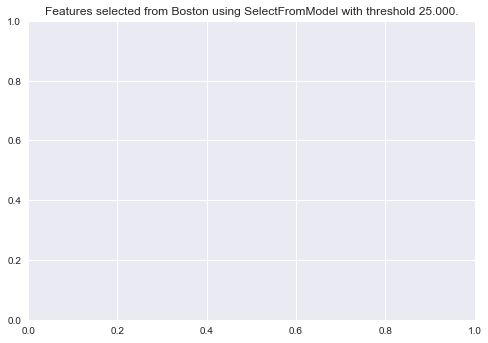

In [62]:
X, y = data1.iloc[:, 3: 61], data1.iloc[:, 61]

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold =  25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 10
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [20]:
X_transform.shape

NameError: name 'X_transform' is not defined

In [22]:
data1 = data2.replace([float('-inf'), float('inf')], np.nan).dropna()

In [23]:
print (data2.shape)
print (data1.shape)

(1060, 62)
(1059, 62)
